In [32]:
import os
import numpy as np
import core
import pylab as plt
import nibabel as nib
from skimage import filters
from scipy import ndimage

planes = np.load('/Users/fair00542/Desktop/DC Image Analysis/DC-project-master/cleancode/planes-params.npy')
pixelspacing = []
path = '/Users/fair00542/Desktop/DC Image Analysis/TestImages/ScanB/1.3.12.2.1107.5.1.4.51967.30000014110308064564000003663.dcm'
if path.endswith('.dcm'):
    array, ConstPixelSpacing, origin, path, affine = core.dicom2np(path)
    #bone = core.thresholdnp(array, 900, 1500)
    #softtissue  = core.thresholdnp(array, 0, 80)
    pixelspacing.append(ConstPixelSpacing)

#threshold, get-rid of outliars
tarray = np.multiply(array, (array>-1024).astype(int))
tarray = np.multiply(tarray, (tarray<3071).astype(int))
array1 = np.multiply(tarray, (tarray>0.0).astype(int))

#skull
skull_mask = (array1>100.0).astype(int) #boolea

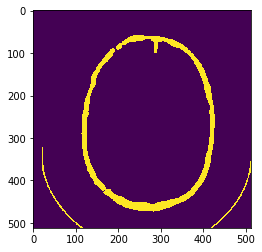

In [49]:
plt.imshow(skull_mask[:,:,65])
plt.show()

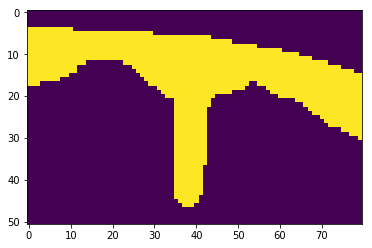

In [60]:
im = skull_mask[:,:,65]
ROI = im[55:106,250:330]
plt.imshow(ROI)
plt.show()

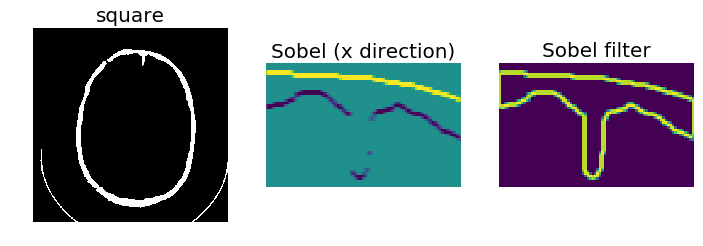

In [61]:
sx = ndimage.sobel(ROI, axis=0, mode='constant')
sy = ndimage.sobel(ROI, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)
plt.show()

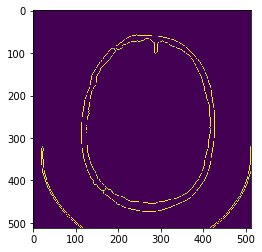

In [57]:
sob_thre = np.multiply(sob,(sob>sob.max()*0.5)).astype(int)
plt.imshow(sob_thre)
plt.show()